In [1]:
#
# --- aufgabe 1 ---
#
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
N = 100
x = np.linspace(0, 4*np.pi, N)
data1 = np.sin(x)
data2 = np.sin(x) + (3*np.sin(2*x + 1) - 1)

In [3]:
def dft_basis(N, k):
    return np.exp(-1j * 2 * np.pi * ((np.arange(N) * k)/N))

def dft(x, max_f):
    #arr_f = np.linspace(0, N/2, N)
    N = len(x)
    #arr_f = np.linspace(-max_f, max_f, N)
    arr_f = np.linspace(0, max_f, N)
    return arr_f, [2/N * np.dot(x, dft_basis(len(x), k)) for k in arr_f]

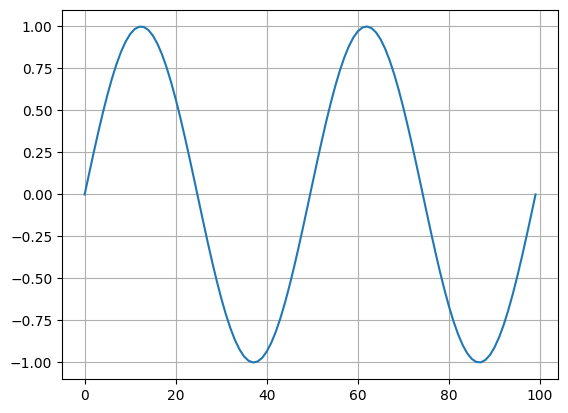

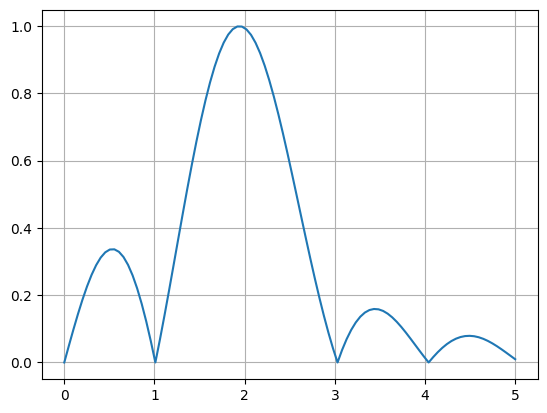

In [4]:
#
# --- f1 ---
#
max_f = 5

plt.grid()
plt.plot(data1)
plt.show()

arr_f, spectrum = dft(data1, max_f)
plt.grid()
plt.plot(arr_f, np.abs(spectrum))

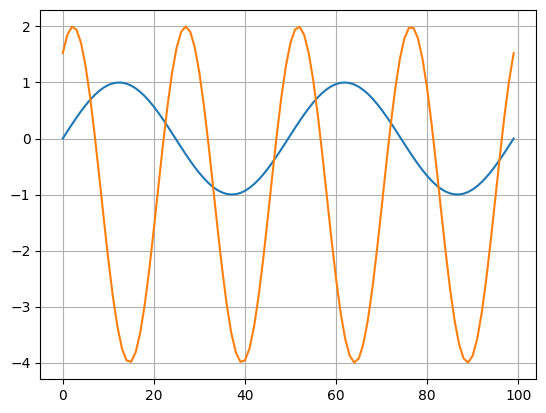

In [5]:
# 
# --- f2 ---
# 
plt.grid()
plt.plot(np.sin(x))
plt.plot((3*np.sin(2*x + 1) - 1))
plt.show()

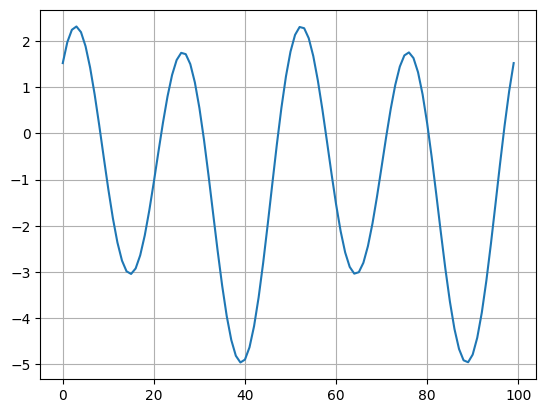

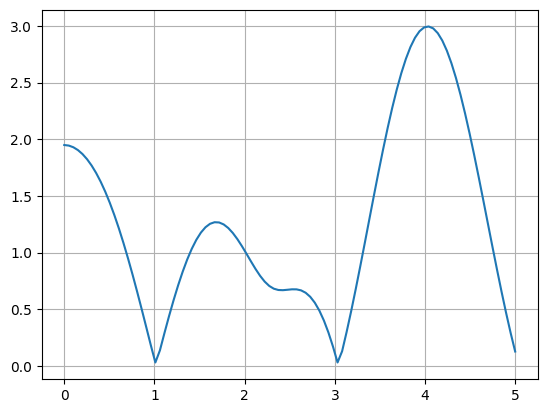

In [6]:
plt.grid()
plt.plot(data2)
plt.show()

arr_f, spectrum = dft(data2, max_f)
plt.grid()
plt.plot(arr_f, np.abs(spectrum))
plt.show()

#plt.grid()
#plt.plot(arr_f, np.angle(spectrum) / np.pi)

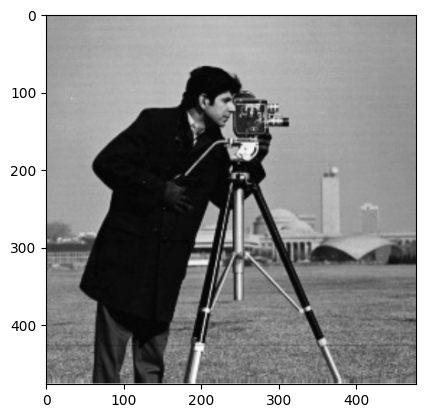

In [7]:
#
# --- aufgabe 2 ---
#

# a)
import cv2 as cv

img = plt.imread("image.png")
plt.imshow(img)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


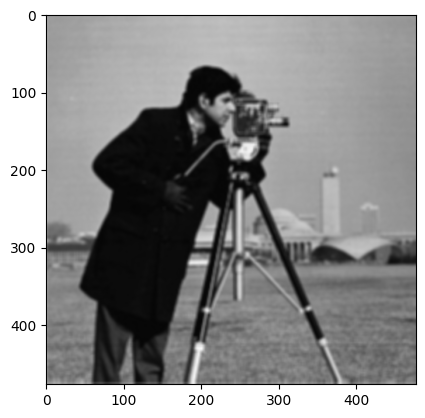

In [8]:
def k(center):
    kernel = np.array([
        [1, 1, 1, 1, 1], 
        [1, 1, 1, 1, 1], 
        [1, 1, center, 1, 1], 
        [1, 1, 1, 1, 1], 
        [1, 1, 1, 1, 1], 
        ])
    return kernel / kernel.sum()

plt.imshow(cv.filter2D(img, -1, k(1)))

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


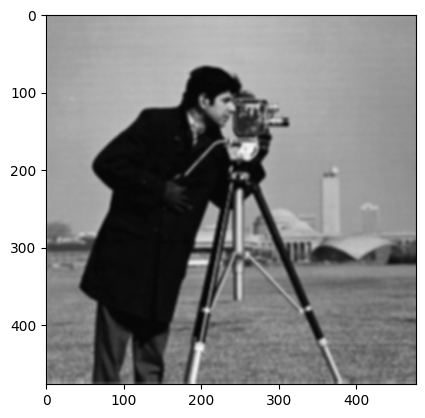

In [9]:
plt.imshow(cv.filter2D(img, -1, k(2)))

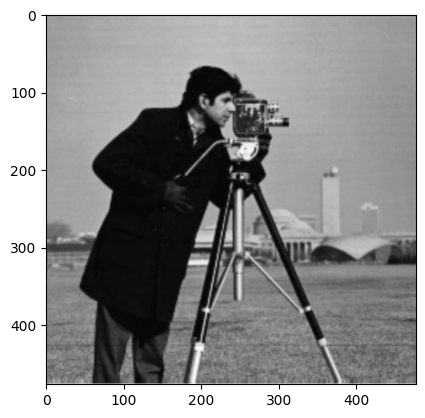

In [10]:
plt.imshow(cv.filter2D(img, -1, k(100)))

In [11]:
# b)
def generate_gaussian_filter(size = 3):
    gaussian_filter = np.zeros((size, size))
    n = size//2
    sigma = n

    # generating the filter
    for y in range(-n, n+1):
        for x in range(-n, n+1):
            normal = 1 / (2.0 * np.pi * sigma**2.0)
            exp_term = np.exp(-(x**2.0 + y**2.0) / (2.0 * sigma**2.0))
            gaussian_filter[y+n, x+n] = normal * exp_term
    return gaussian_filter / gaussian_filter.sum()

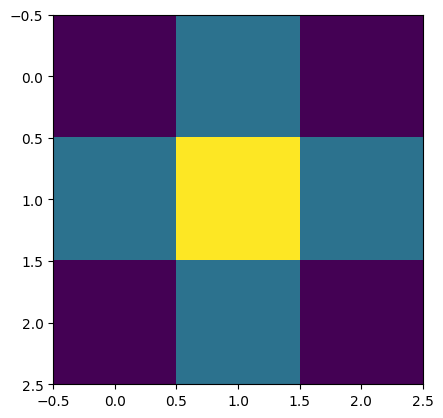

In [12]:
plt.imshow(generate_gaussian_filter(3))

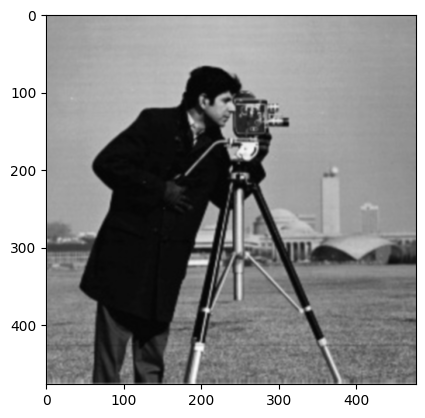

In [13]:
plt.imshow(cv.filter2D(img, -1, generate_gaussian_filter(3)))

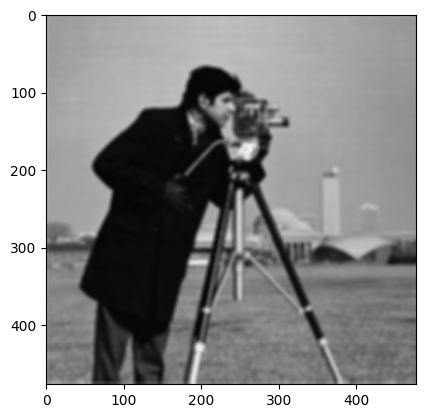

In [14]:
plt.imshow(cv.filter2D(img, -1, generate_gaussian_filter(7)))

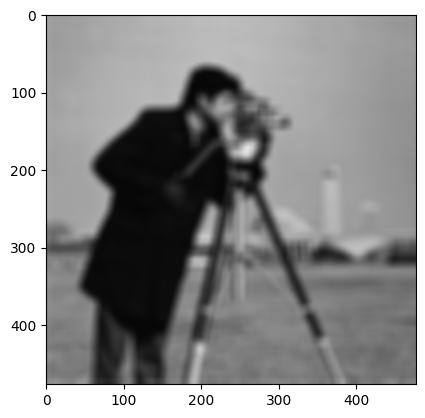

In [15]:
plt.imshow(cv.filter2D(img, -1, generate_gaussian_filter(15)))